<h2>Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information

<h3>1.MinMax Normalization
<h3>Xi = [X - Xmin] / [Xmax - Xmin]
<h3>scaled between [0,1]

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\wine_data.csv",usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']

In [25]:
df.head()

,Class label,Alcohol,Malic acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76


<Axes: xlabel='Alcohol', ylabel='Density'>

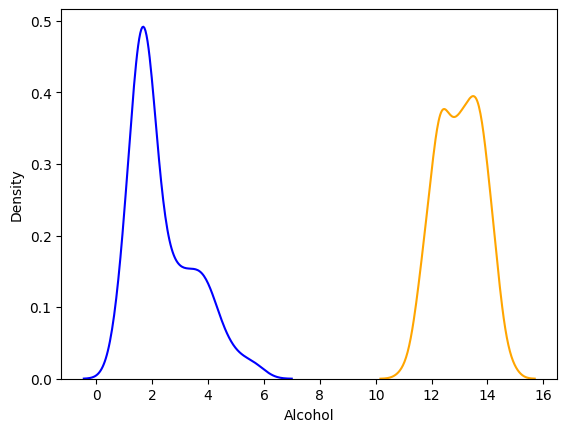

In [32]:
sns.kdeplot(df['Alcohol'],color='orange')
sns.kdeplot(df['Malic acid'],color='blue')

<Axes: xlabel='Class label'>

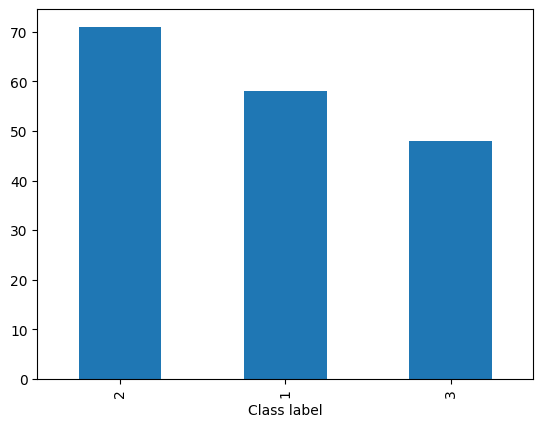

In [33]:
df['Class label'].value_counts().plot(kind='bar')

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Class label',axis=1),df['Class label'],test_size=0.3,random_state=0)

x_train.shape,x_test.shape

((123, 2), (54, 2))

In [55]:
x_train

,Alcohol,Malic acid
22,12.85,1.60
108,11.61,1.35
174,13.27,4.28
144,13.16,3.57
71,13.49,1.66
...,...,...
103,12.51,1.73
67,13.34,0.94
117,12.77,3.43
47,14.10,2.02


In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [62]:
x_train_scale=pd.DataFrame(x_train_scale,columns=x_train.columns)
x_test_scale=pd.DataFrame(x_test_scale,columns=x_train.columns)


In [63]:
np.round(x_train.describe(),1)



,Alcohol,Malic acid
count,123.0,123.0
mean,13.0,2.3
std,0.8,1.2
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.8
75%,13.6,3.1
max,14.8,5.8


<Axes: xlabel='Alcohol', ylabel='Malic acid'>

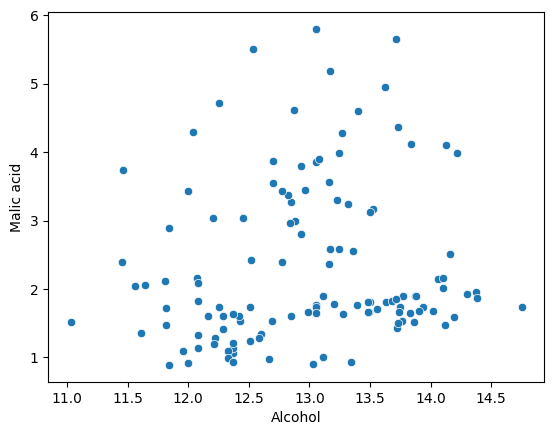

In [69]:
sns.scatterplot(x=x_train['Alcohol'],y=x_train['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

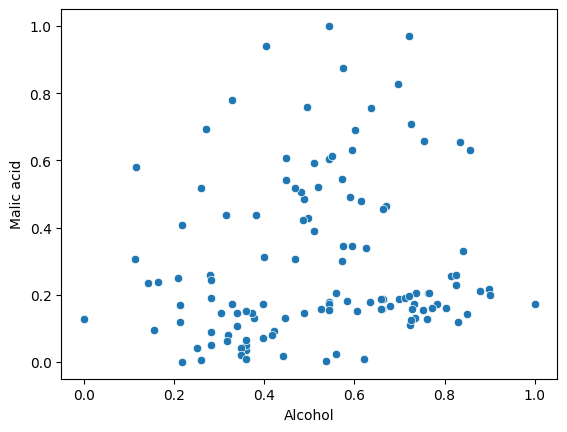

In [65]:
sns.scatterplot(x=x_train_scale['Alcohol'],y=x_train_scale['Malic acid'])

<h3>2.Mean Normalization
<h3>xi = [x - x_mean] / [Xmax - Xmin]
<h3>mean centering [-1,1]
<h3>used in algorithms where Centered Data is required

<h3>3.MaxAbsScaling
<h3> x = x / abs[Xmax]

<h3>Used when you have sparse data(Data contains so many 0 values)

In [66]:
from sklearn.preprocessing import MaxAbsScaler

scalerMA = MaxAbsScaler()

scalerMA.fit(x_train)

x_train_scale_MA = scaler.fit_transform(x_train)
x_test_scale_MA = scaler.transform(x_test)

In [67]:
x_train_scale_MA=pd.DataFrame(x_train_scale_MA,columns=x_train.columns)
x_test_scale_MA=pd.DataFrame(x_test_scale_MA,columns=x_train.columns)


<Axes: xlabel='Alcohol', ylabel='Malic acid'>

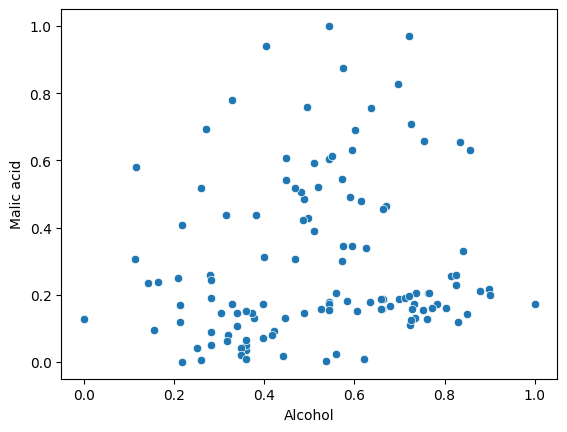

In [70]:
sns.scatterplot(x=x_train_scale_MA['Alcohol'],y=x_train_scale_MA['Malic acid'])

<h3>4.Robust Scaling
<h3>x = x - Xmedian / IQR[75%-25%]
<h3>Robust to outliers(If your data got lots of Outliers)

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

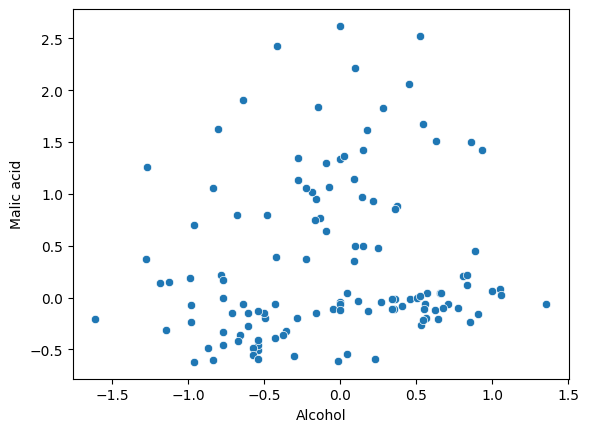

In [72]:
from sklearn.preprocessing import robust_scale

x_train_scale_R = robust_scale(x_train)
x_test_scale_R = robust_scale(x_test)

x_train_scale_R = pd.DataFrame(x_train_scale_R, columns=x_train.columns)
x_test_scale_R = pd.DataFrame(x_test_scale_R, columns=x_test.columns)

sns.scatterplot(x=x_train_scale_R['Alcohol'], y=x_train_scale_R['Malic acid'])


<h3>Normalization vs Standardization
<h3>steps:
<h3>1.Is feature Scaling required
<h3>2.MinMax(when min - max known)
<h3>3.